# JOINS

![SQL Joins Cheat Sheet: Types of SQL Joins (Inner, Left, Right, and Full join)](https://www.ml4devs.com/images/illustrations/sql-joins-cheatsheet.webp)  

Source: https://www.ml4devs.com/articles/sql-joins-tutorial-inner-join-left-join-right-join-full-join-cross-join/

## LEFT JOIN

![SQL LEFT JOIN](https://www.sqltutorial.org/wp-content/uploads/2016/03/SQL-LEFT-JOIN.png)

Давайте обєнаємо таблиці Країни та Локації.

![countries_locations_tables](https://www.sqltutorial.org/wp-content/uploads/2016/03/countries_locations_tables.png)

In [3]:
use hr_db

Commands completed successfully.

Total execution time: 00:00:00

In [3]:
SELECT
	country_id,
	country_name
FROM
	countries
WHERE
	country_id IN ('US', 'UK', 'CN');

(3 rows affected)

Total execution time: 00:00:00.014

country_id,country_name
CN,China
UK,United Kingdom
US,United States of America


In [4]:
SELECT
	country_id,
	street_address,
	city
FROM
	locations
WHERE
	country_id IN ('US', 'UK', 'CN');

(5 rows affected)

Total execution time: 00:00:00.017

country_id,street_address,city
US,2014 Jabberwocky Rd,Southlake
US,2011 Interiors Blvd,South San Francisco
US,2004 Charade Rd,Seattle
UK,8204 Arthur St,London
UK,"Magdalen Centre, The Oxford Science Park",Oxford


In [5]:
SELECT
	c.country_name,
	c.country_id,
	l.country_id,
	l.street_address,
	l.city
FROM
	countries c
LEFT JOIN locations l ON l.country_id = c.country_id
WHERE
	c.country_id IN ('US', 'UK', 'CN')
-- check NULLS

(6 rows affected)

Total execution time: 00:00:00.017

country_name,country_id,country_id,street_address,city
China,CN,NULL,NULL,NULL
United Kingdom,UK,UK,8204 Arthur St,London
United Kingdom,UK,UK,"Magdalen Centre, The Oxford Science Park",Oxford
United States of America,US,US,2014 Jabberwocky Rd,Southlake
United States of America,US,US,2011 Interiors Blvd,South San Francisco
United States of America,US,US,2004 Charade Rd,Seattle


Додамо ще Регіони

![location_tables](https://www.sqltutorial.org/wp-content/uploads/2016/03/location_tables.png)

In [6]:
SELECT
	r.region_name,
	c.country_name,
	l.street_address,
	l.city
FROM
	regions r
LEFT JOIN countries c ON c.region_id = r.region_id
LEFT JOIN locations l ON l.country_id = c.country_id
WHERE
	c.country_id IN ('US', 'UK', 'CN');

(6 rows affected)

Total execution time: 00:00:00.016

region_name,country_name,street_address,city
Asia,China,NULL,NULL
Europe,United Kingdom,8204 Arthur St,London
Europe,United Kingdom,"Magdalen Centre, The Oxford Science Park",Oxford
Americas,United States of America,2014 Jabberwocky Rd,Southlake
Americas,United States of America,2011 Interiors Blvd,South San Francisco
Americas,United States of America,2004 Charade Rd,Seattle


---

## INNER JOIN

![SQL INNER JOIN](https://www.sqltutorial.org/wp-content/uploads/2016/03/SQL-INNER-JOIN.png)

![emp_dept_tables](https://www.sqltutorial.org/wp-content/uploads/2016/03/emp_dept_tables.png)

In [4]:
-- departments list
SELECT
	department_id,
	department_name
FROM
	departments
WHERE
	department_id IN (1, 2, 3);

(3 rows affected)

Total execution time: 00:00:00.010

department_id,department_name
1,Administration
2,Marketing
3,Purchasing


In [5]:
-- employees for this departments
SELECT
	first_name,
	last_name,
	department_id
FROM
	employees
WHERE
	department_id IN (1, 2, 3)
ORDER BY
	department_id;

(9 rows affected)

Total execution time: 00:00:00.015

first_name,last_name,department_id
Jennifer,Whalen,1
Michael,Hartstein,2
Pat,Fay,2
Den,Raphaely,3
Alexander,Khoo,3
Shelli,Baida,3
Sigal,Tobias,3
Guy,Himuro,3
Karen,Colmenares,3


In [8]:
SELECT 
    first_name,
    last_name,
    employees.department_id,
    departments.department_id,
    department_name
FROM
    employees
        INNER JOIN
    departments ON departments.department_id = employees.department_id
WHERE
    employees.department_id IN (1 , 2, 3);

(9 rows affected)

Total execution time: 00:00:00.006

first_name,last_name,department_id,department_id,department_name
Den,Raphaely,3,3,Purchasing
Alexander,Khoo,3,3,Purchasing
Shelli,Baida,3,3,Purchasing
Sigal,Tobias,3,3,Purchasing
Guy,Himuro,3,3,Purchasing
Karen,Colmenares,3,3,Purchasing
Jennifer,Whalen,1,1,Administration
Michael,Hartstein,2,2,Marketing
Pat,Fay,2,2,Marketing


![emp_dept_jobs_tables](https://www.sqltutorial.org/wp-content/uploads/2016/03/emp_dept_jobs_tables.png)

In [9]:
SELECT
	first_name,
	last_name,
	job_title,
	department_name
FROM
	employees e
INNER JOIN departments d ON d.department_id = e.department_id
INNER JOIN jobs j ON j.job_id = e.job_id
WHERE
	e.department_id IN (1, 2, 3);

(9 rows affected)

Total execution time: 00:00:00.013

first_name,last_name,job_title,department_name
Den,Raphaely,Purchasing Manager,Purchasing
Alexander,Khoo,Purchasing Clerk,Purchasing
Shelli,Baida,Purchasing Clerk,Purchasing
Sigal,Tobias,Purchasing Clerk,Purchasing
Guy,Himuro,Purchasing Clerk,Purchasing
Karen,Colmenares,Purchasing Clerk,Purchasing
Jennifer,Whalen,Administration Assistant,Administration
Michael,Hartstein,Marketing Manager,Marketing
Pat,Fay,Marketing Representative,Marketing


---

## SELF JOIN

Знайдео керівника для поточного працівника:

  

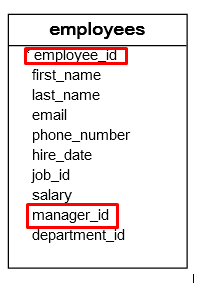

In [11]:
SELECT 
    CONCAT(e.first_name, ' ', e.last_name) AS employee, 
    CONCAT(m.first_name, ' ', m.last_name) AS manager
FROM
    employees e
        INNER JOIN
    employees m ON m.employee_id = e.manager_id
ORDER BY manager;

(39 rows affected)

Total execution time: 00:00:00.076

employee,manager
Bruce Ernst,Alexander Hunold
David Austin,Alexander Hunold
Valli Pataballa,Alexander Hunold
Diana Lorentz,Alexander Hunold
Alexander Khoo,Den Raphaely
Shelli Baida,Den Raphaely
Sigal Tobias,Den Raphaely
Guy Himuro,Den Raphaely
Karen Colmenares,Den Raphaely
Alexander Hunold,Lex De Haan


In [12]:
SELECT 
    CONCAT(e.first_name, ' ', e.last_name) AS employee, 
    CONCAT(m.first_name, ' ', m.last_name) AS manager
FROM
    employees e
        LEFT JOIN -- NULL is present
    employees m ON m.employee_id = e.manager_id
ORDER BY manager;

(40 rows affected)

Total execution time: 00:00:00.012

employee,manager
Steven King,
Bruce Ernst,Alexander Hunold
David Austin,Alexander Hunold
Valli Pataballa,Alexander Hunold
Diana Lorentz,Alexander Hunold
Alexander Khoo,Den Raphaely
Shelli Baida,Den Raphaely
Sigal Tobias,Den Raphaely
Guy Himuro,Den Raphaely
Karen Colmenares,Den Raphaely


---

## FULL JOIN

![SQL FULL OUTER JOIN](https://www.sqltutorial.org/wp-content/uploads/2016/07/SQL-FULL-OUTER-JOIN.png)

### EXTEND DB


In [13]:
CREATE TABLE fruits (
	fruit_id INTEGER PRIMARY KEY,
	fruit_name VARCHAR (255) NOT NULL,
	basket_id INTEGER
);

Commands completed successfully.

Total execution time: 00:00:00.006

In [14]:
CREATE TABLE baskets (
	basket_id INTEGER PRIMARY KEY,
	basket_name VARCHAR (255) NOT NULL
);

Commands completed successfully.

Total execution time: 00:00:00.006

In [15]:
INSERT INTO baskets (basket_id, basket_name)
VALUES
	(1, 'A'),
	(2, 'B'),
	(3, 'C');

INSERT INTO fruits (
	fruit_id,
	fruit_name,
	basket_id
)
VALUES
	(1, 'Apple', 1),
	(2, 'Orange', 1),
	(3, 'Banana', 2),
	(4, 'Strawberry', NULL);

(3 rows affected)

(4 rows affected)

Total execution time: 00:00:00.007

In [16]:
SELECT
	basket_name,
	fruit_name
FROM
	fruits
FULL OUTER JOIN baskets ON baskets.basket_id = fruits.basket_id;

(5 rows affected)

Total execution time: 00:00:00.016

basket_name,fruit_name
A,Apple
A,Orange
B,Banana
NULL,Strawberry
C,NULL


In [17]:
-- where is no fruits
SELECT
	basket_name,
	fruit_name
FROM
	fruits
FULL OUTER JOIN baskets ON baskets.basket_id = fruits.basket_id
WHERE
	fruit_name IS NULL;

(1 row affected)

Total execution time: 00:00:00.014

basket_name,fruit_name
C,NULL


In [18]:
-- what is out of basket
SELECT
	basket_name,
	fruit_name
FROM
	fruits
FULL OUTER JOIN baskets ON baskets.basket_id = fruits.basket_id
WHERE
	basket_name IS NULL;

(1 row affected)

Total execution time: 00:00:00.012

basket_name,fruit_name
NULL,Strawberry


---

## CROSS JOIN

Знаходження комбінацій

![SQL CROSS JOIN](https://www.sqltutorial.org/wp-content/uploads/2018/01/SQL-CROSS-JOIN.png)

## INSERT DATA

In [19]:
CREATE TABLE sales_organization (
	sales_org_id INT PRIMARY KEY,
	sales_org VARCHAR (255)
);

Commands completed successfully.

Total execution time: 00:00:00.082

In [20]:
CREATE TABLE sales_channel (
	channel_id INT PRIMARY KEY,
	channel VARCHAR (255)
);

Commands completed successfully.

Total execution time: 00:00:00.004

In [21]:
INSERT INTO sales_organization (sales_org_id, sales_org)
VALUES
	(1, 'Domestic'),
	(2, 'Export');

INSERT INTO sales_channel (channel_id, channel)
VALUES
	(1, 'Wholesale'),
	(2, 'Retail'),
	(3, 'eCommerce'),
	(4, 'TV Shopping');

(2 rows affected)

(4 rows affected)

Total execution time: 00:00:00.007

In [22]:
SELECT
	sales_org,
	channel
FROM
	sales_organization
CROSS JOIN sales_channel; 

(8 rows affected)

Total execution time: 00:00:00.009

sales_org,channel
Domestic,Wholesale
Domestic,Retail
Domestic,eCommerce
Domestic,TV Shopping
Export,Wholesale
Export,Retail
Export,eCommerce
Export,TV Shopping


In [23]:
SELECT
	sales_org,
	channel
FROM
	sales_organization,
	sales_channel;

(8 rows affected)

Total execution time: 00:00:00.003

sales_org,channel
Domestic,Wholesale
Domestic,Retail
Domestic,eCommerce
Domestic,TV Shopping
Export,Wholesale
Export,Retail
Export,eCommerce
Export,TV Shopping


In [26]:
SELECT
	sales_org,
	channel
FROM
	sales_organization
INNER JOIN sales_channel ON 1 = 1;

(8 rows affected)

Total execution time: 00:00:00.003

sales_org,channel
Domestic,Wholesale
Domestic,Retail
Domestic,eCommerce
Domestic,TV Shopping
Export,Wholesale
Export,Retail
Export,eCommerce
Export,TV Shopping
